In [143]:
#import os
#os.getcwd()                 #to see current directory

In [144]:
#!pip install pydotplus      #used for nice graph visualization

In [145]:
#conda install python-graphviz

In [146]:
from sklearn import tree #For our Decision Tree
import pandas as pd # For our DataFrame
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Let us examine the golf dataset after importing the CSV file

In [148]:
gfc=pd.read_csv('golf_df.csv')
gfc.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [149]:
gfc.info()                      #shows null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


We can see that there are 14 observations and there are no missing valus in any of the variables. Let us see the levels that
a categorical value can have and the descriptive statistics for the numerical variables

In [151]:
gfc.value_counts()

Outlook   Temperature  Humidity  Windy  Play
overcast  cool         normal    True   yes     1
          hot          high      False  yes     1
                       normal    False  yes     1
          mild         high      True   yes     1
rainy     cool         normal    False  yes     1
                                 True   no      1
          mild         high      False  yes     1
                                 True   no      1
                       normal    False  yes     1
sunny     cool         normal    False  yes     1
          hot          high      False  no      1
                                 True   no      1
          mild         high      False  no      1
                       normal    True   yes     1
Name: count, dtype: int64

## Features (independent X) and Label (dependent variables Y)

In [153]:
#Seperate the dependent and independent variables
X= gfc.iloc[:,0:4]
X.head()

,Outlook,Temperature,Humidity,Windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False


In [154]:
Y=gfc.iloc[:,-1]
Y.head()

0     no
1     no
2    yes
3    yes
4    yes
Name: Play, dtype: object

In [155]:
Y.value_counts()             #shows the number of yes and no values

Play
yes    9
no     5
Name: count, dtype: int64

## Convert Categorical variable values into dummy variables

In [157]:
#Convert the categorical variable values into dummy variables using one hot encoding

one_hot_en = pd.get_dummies(gfc[ ['Outlook', 'Temperature', 'Humidity', 'Windy'] ])

In [158]:
one_hot_en.head()

,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal
0,False,False,False,True,False,True,False,True,False
1,True,False,False,True,False,True,False,True,False
2,False,True,False,False,False,True,False,True,False
3,False,False,True,False,False,False,True,True,False
4,False,False,True,False,True,False,False,False,True


## Seperate Train and Test data

In [160]:
 X_train, X_test, y_train, y_test = train_test_split(one_hot_en, Y, test_size=0.30, random_state=1)

In [161]:
#we just check that there are 9 observations in training dataset Versus 6 in testing dataset
X_train.count()

Windy               9
Outlook_overcast    9
Outlook_rainy       9
Outlook_sunny       9
Temperature_cool    9
Temperature_hot     9
Temperature_mild    9
Humidity_high       9
Humidity_normal     9
dtype: int64

## Train Model 1 - without seperating train and test data

**clf_train is our trained decision tree**

In [164]:
#Let us fit a classifier without changing any parameters of scikit-learn
clf = tree.DecisionTreeClassifier()

# Training the Decision Tree
clf_train = clf.fit(one_hot_en, gfc['Play'])              #training ALL data samples and testing. Not good

In [165]:
# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(clf_train, None))

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[1] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="x[7] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
2 -> 3 ;
4 [label="x[6] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
4 -> 6 ;
7 [label="x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 7 ;
8 [label="x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
8 -> 10 ;
11 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
7 -> 11 ;
12 [label="gini = 0.0\nsam

## Decision tree visualization

In [167]:
#Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_en.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True)

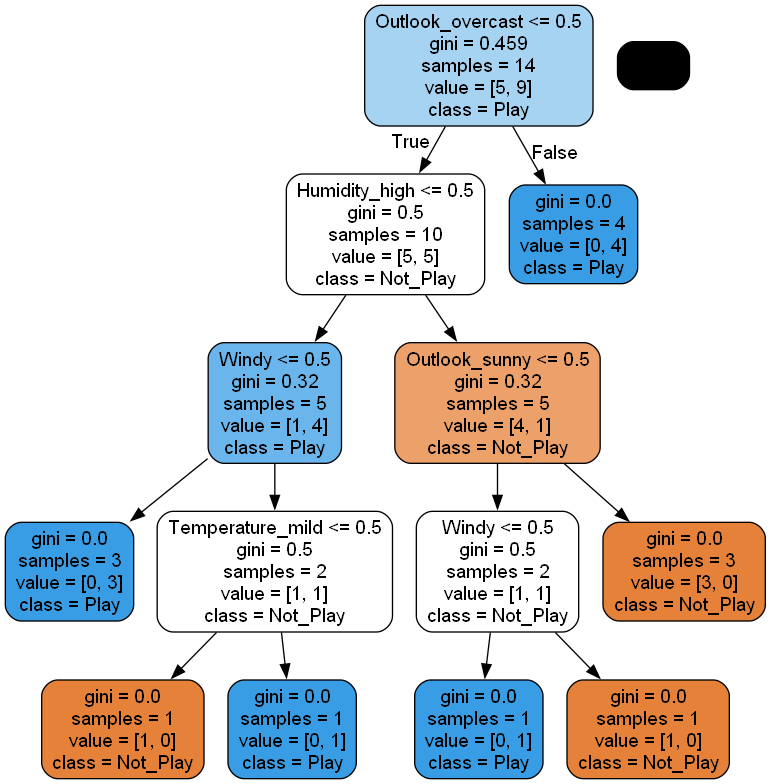

In [168]:
#Create Graph from DOT data
from IPython.display import Image, display
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())  

If gini is 0 then it is a pure node and there will not be any further splitting where as gini>0 will be an impure node and will
further split. 

## Scoring the decision

In [171]:
# Outlook = sunny,Temperature =  hot, Humidity = normal, Windy = false
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

#function return of 1.0 means 100% correct prediction

1.0
1.0


## Confusion Matrix in numpy.ndarray

**Confusion Matrix in numpy.ndarray**

In [174]:
y_predict = clf.predict(X_test)

cm = confusion_matrix(y_test, y_predict)

cm

array([[1, 0],
       [0, 4]], dtype=int64)

**Confusion Matrix in pandas dataframe**

In [176]:
df_cm = pd.DataFrame(cm, index = [i for i in ["no","yes"]],
                  columns = [i for i in ["no","yes"]])

df_cm

,no,yes
no,1,0
yes,0,4


**Confusion Matrix in heatmap (using pandas)**

<Axes: >

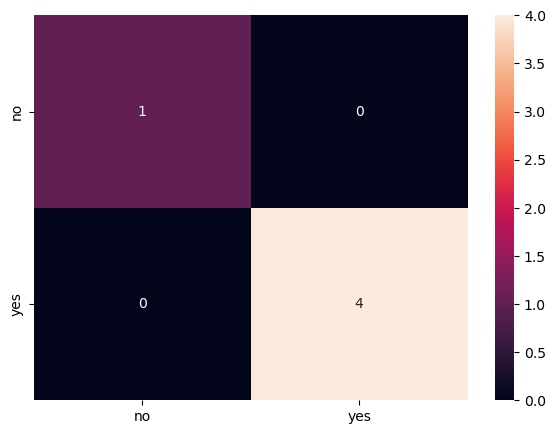

In [178]:
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Train Model 2 - AFTER seperating train and test data

In [180]:
dTreeR = tree.DecisionTreeClassifier(max_depth = 3, random_state=1)

#Train model
dTreeR.fit(X_train, y_train)

print(dTreeR.score(X_train, y_train))                   #training score
print(dTreeR.score(X_test, y_test))                     #testing score based on model

1.0
0.4


0.4


<Axes: >

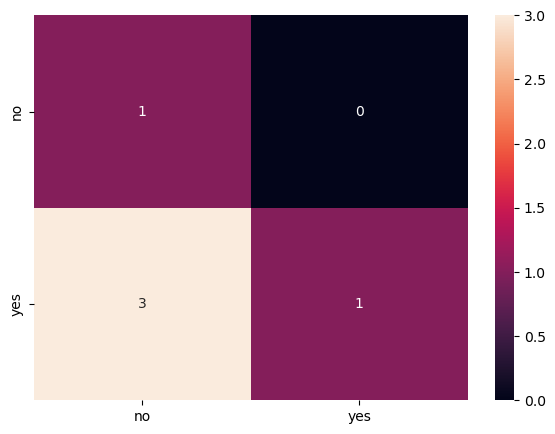

In [181]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

y_predict
cm = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index = [i for i in ["no","yes"]],
                  columns = [i for i in ["no","yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [182]:
#Create Dot Data
dot_data = tree.export_graphviz(dTreeR, out_file=None, feature_names=list(one_hot_en.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True) 

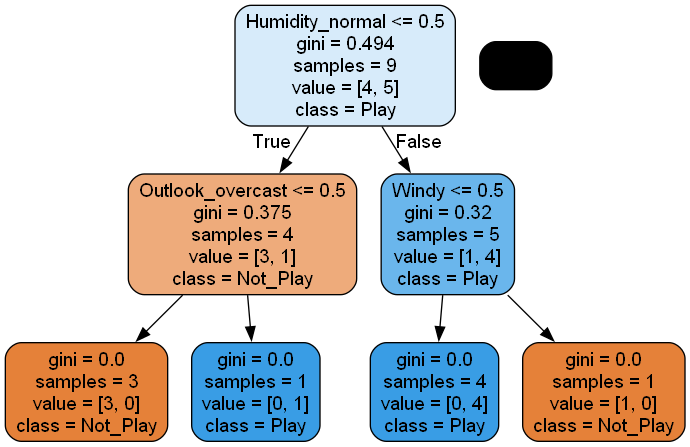

In [183]:
#Create Graph from DOT data
from IPython.display import Image, display
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())